# PCA: finding out which features are the most important

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Setting random seed to get reproducible runs
RSEED = 100

## Part 1: Importing the data

In [66]:
data = pd.read_csv("cancer_industry.csv", low_memory=False)

In [67]:
data.head()

locale  fips areatype  cancer  stateFIPS    state  \
0  Autauga County(6,10)  1001   county       1          1  alabama   
1  Autauga County(6,10)  1001   county       3          1  alabama   
2  Autauga County(6,10)  1001   county      17          1  alabama   
3  Autauga County(6,10)  1001   county      18          1  alabama   
4  Autauga County(6,10)  1001   county      20          1  alabama   

      cancer_description  annual_count_avg  incidence rate_per_100000  \
0       All Cancer Sites               304                      495.6   
1  Oral Cavity & Pharynx                 8                       13.5   
2              Esophagus                 0                        0.0   
3                Stomach                 6                        9.1   
4         Colon & Rectum                32                       52.2   

   incidence rate_lower_95_confidence  ...      METL  MINE       MSW  \
0                               470.6  ...  0.000177   0.0  3.332971   
1                                 9.6  ...  0.000177   0.0  3.332971   
2                                 0.0  ...  0.000177   0.0  3.332971   
3                                 6.0  ...  0.000177   0.0  3.332971   
4                                44.2  ...  0.000177   0.0  3.332971   

          NREN      OZON      PEST          REN      SMOG        VADD  \
0  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
1  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
2  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
3  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
4  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   

        WATR  
0  27.485562  
1  27.485562  
2  27.485562  
3  27.485562  
4  27.485562  

[5 rows x 35 columns]

## Part 2: analysis

Names of environemental factors: ['Acid Rain', 'Energy', 'Freshwater Aquatic Ecotoxicity', 'Eutrophication', 'Food Waste', 'Global Climate Change', 'Hazardous Air Pollutants', 'Hazardous Waste', 'Human Health Cancer', 'Human Health Noncancer', 'Human Health - Respiratory Effects', 'Human Health Cancer and Noncancer', 'Employment', 'Land', 'Metals', 'Minerals and Metals', 'Muncipal Solid Waste', 'Nonrenewable Energy', 'Ozone Depletion', 'Pesticides', 'Renewable Energy', 'Smog Formation', 'Value Added', 'Water']

In [68]:
data.columns

Index(['locale', 'fips', 'areatype', 'cancer', 'stateFIPS', 'state',
       'cancer_description', 'annual_count_avg', 'incidence rate_per_100000',
       'incidence rate_lower_95_confidence',
       'incidence rate_upper_95_confidence', 'ACID', 'ENRG', 'ETOX', 'EUTR',
       'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS',
       'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG',
       'VADD', 'WATR'],
      dtype='object')

In [69]:
data.head()

locale  fips areatype  cancer  stateFIPS    state  \
0  Autauga County(6,10)  1001   county       1          1  alabama   
1  Autauga County(6,10)  1001   county       3          1  alabama   
2  Autauga County(6,10)  1001   county      17          1  alabama   
3  Autauga County(6,10)  1001   county      18          1  alabama   
4  Autauga County(6,10)  1001   county      20          1  alabama   

      cancer_description  annual_count_avg  incidence rate_per_100000  \
0       All Cancer Sites               304                      495.6   
1  Oral Cavity & Pharynx                 8                       13.5   
2              Esophagus                 0                        0.0   
3                Stomach                 6                        9.1   
4         Colon & Rectum                32                       52.2   

   incidence rate_lower_95_confidence  ...      METL  MINE       MSW  \
0                               470.6  ...  0.000177   0.0  3.332971   
1                                 9.6  ...  0.000177   0.0  3.332971   
2                                 0.0  ...  0.000177   0.0  3.332971   
3                                 6.0  ...  0.000177   0.0  3.332971   
4                                44.2  ...  0.000177   0.0  3.332971   

          NREN      OZON      PEST          REN      SMOG        VADD  \
0  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
1  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
2  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
3  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   
4  1558.288943  0.000008  0.000069  1050.867678  9.764524  168.936475   

        WATR  
0  27.485562  
1  27.485562  
2  27.485562  
3  27.485562  
4  27.485562  

[5 rows x 35 columns]

In [70]:
type(data)

pandas.core.frame.DataFrame

In [71]:
data['stateFIPS'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56],
      dtype=int64)

In [98]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516], dtype=int64)

In [73]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [74]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==3
print("example:")
print(cancerTypes[cancer]["cancer_description"].to_string())

    cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    N

In [75]:
factors=np.array(['ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'])

### Let's use PCA on the data_set

"Principal component analysis is a technique used to reduce the dimensionality of a data set. PCA is typically employed prior to implementing a machine learning algorithm because it minimizes the number of variables used to explain the maximum amount of variance for a given data set."

#### Covariance matrices

cancer type: 1
0    All Cancer Sites
cancer type: 3
1    Oral Cavity & Pharynx
cancer type: 17
2    Esophagus
cancer type: 18
3    Stomach
cancer type: 20
4    Colon & Rectum
cancer type: 35
5    Liver & Bile Duct
cancer type: 40
6    Pancreas
cancer type: 47
7    Lung & Bronchus
cancer type: 53
8    Melanoma of the Skin
cancer type: 55
9    Breast (Female)
cancer type: 57
10    Cervix (Female)
cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
cancer type: 61
12    Ovary (Female)
cancer type: 66
13    Prostate (Male)
cancer type: 71
14    Bladder
cancer type: 72
15    Kidney & Renal Pelvis
cancer type: 76
16    Brain & ONS
cancer type: 80
17    Thyroid
cancer type: 86
18    Non-Hodgkin Lymphoma
cancer type: 90
19    Leukemia
cancer type: 400
20    Breast (in situ) (Female)


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


cancer type: 515
21    Childhood (Ages <20, All Sites)
cancer type: 516
22    Childhood (Ages <15, All Sites)


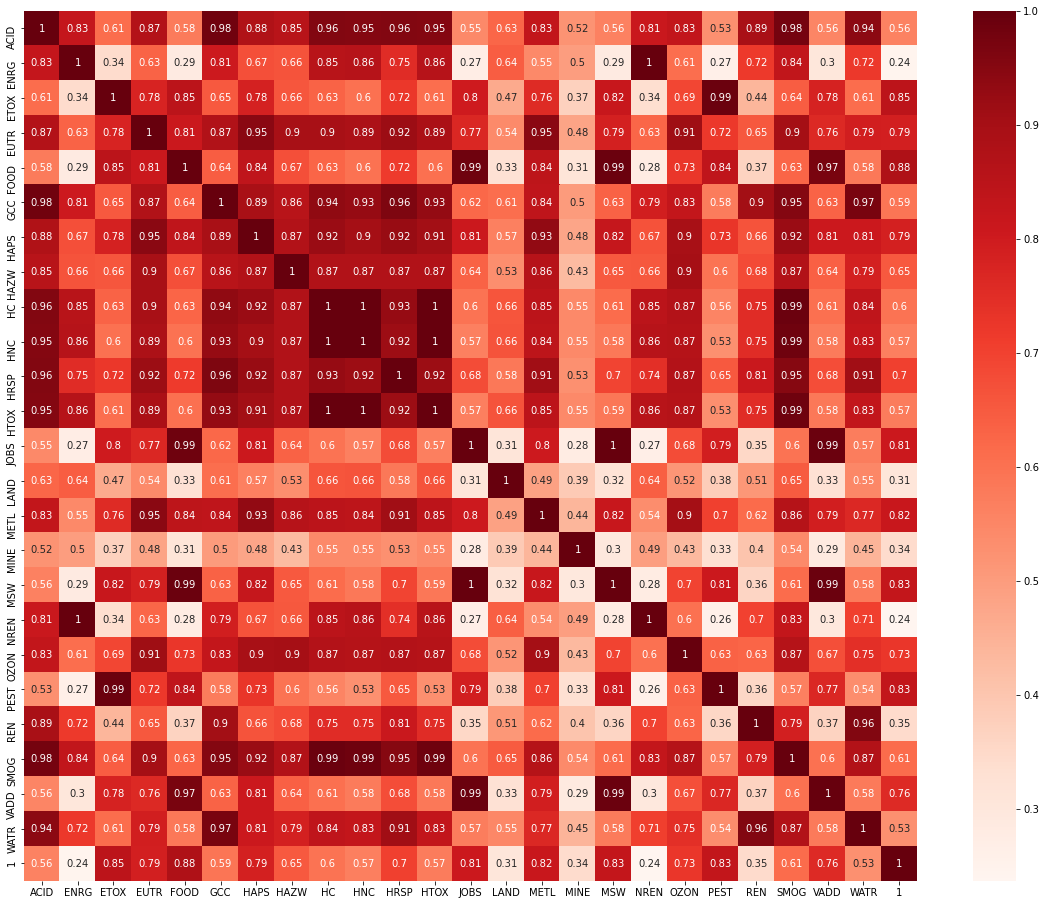

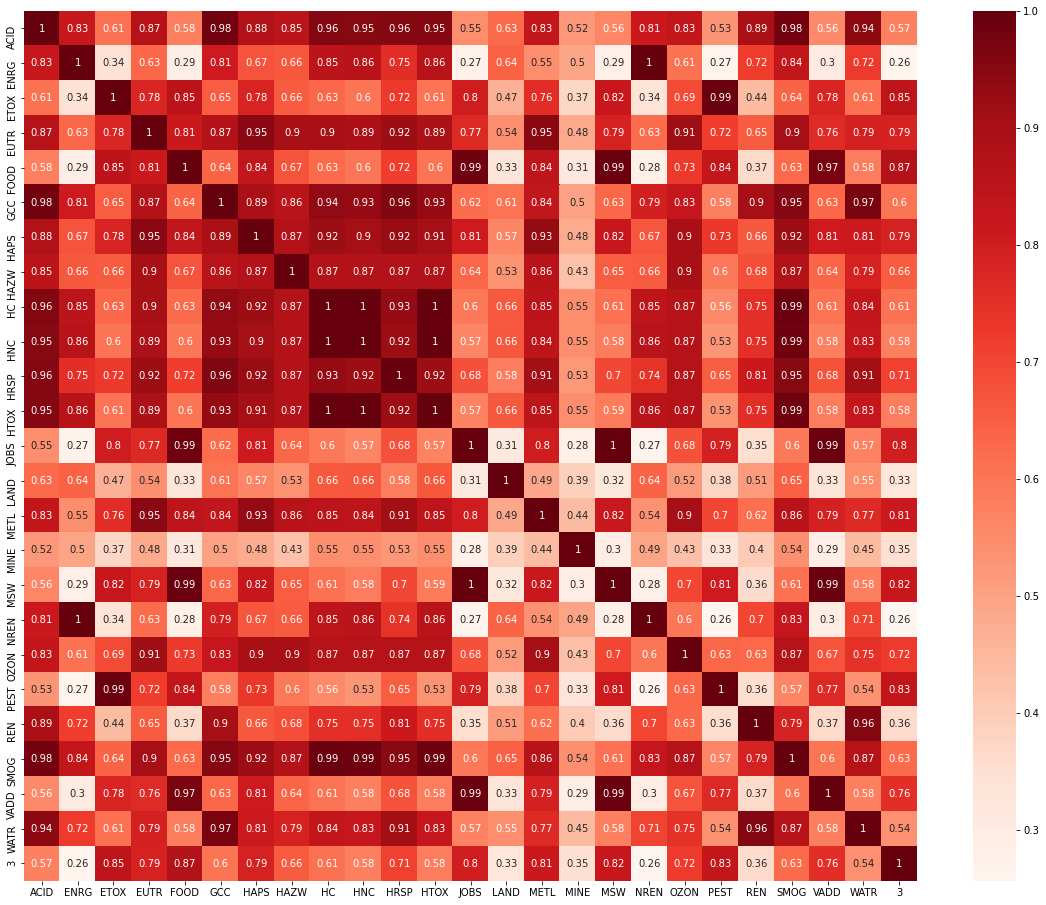

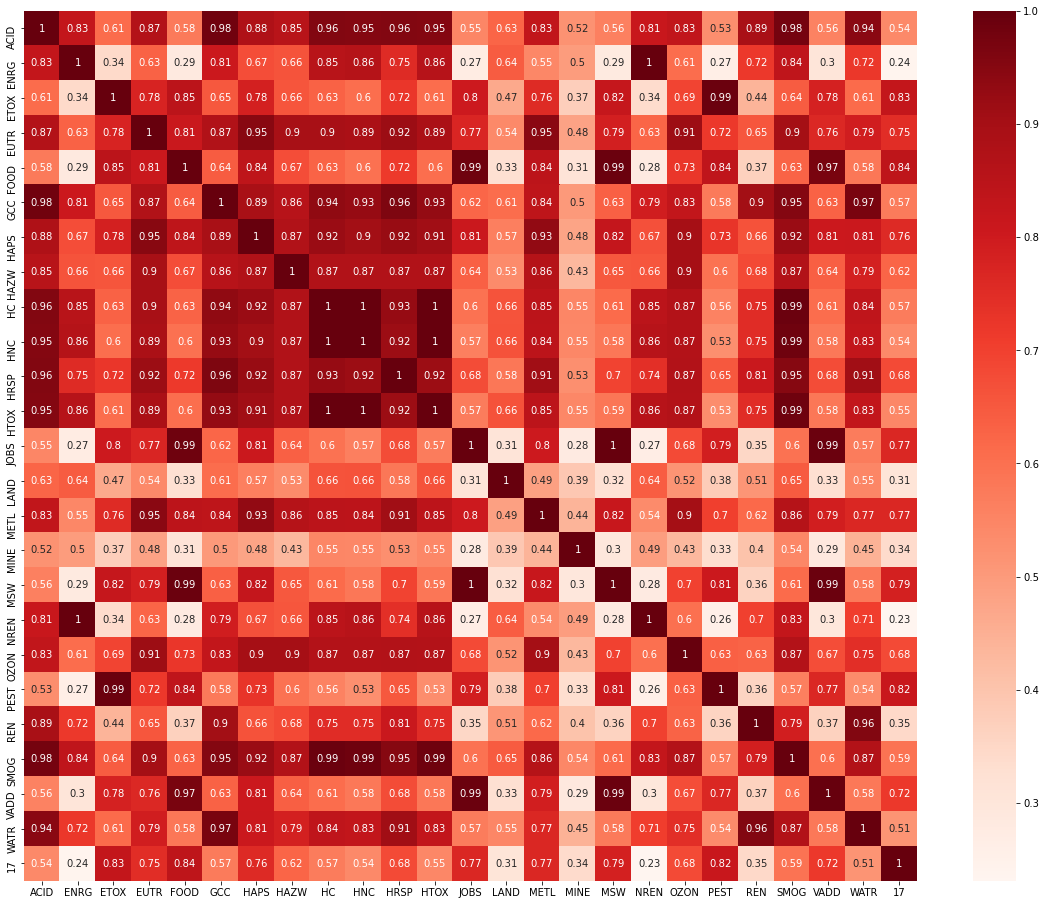

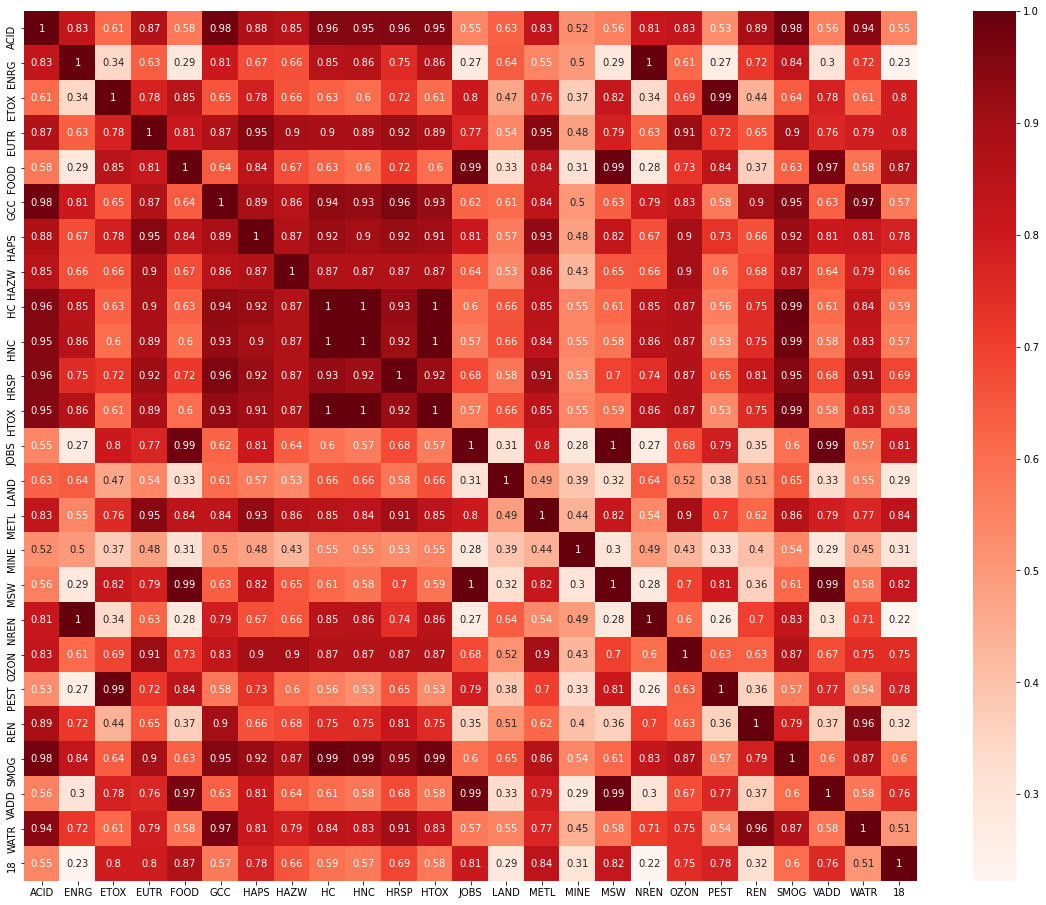

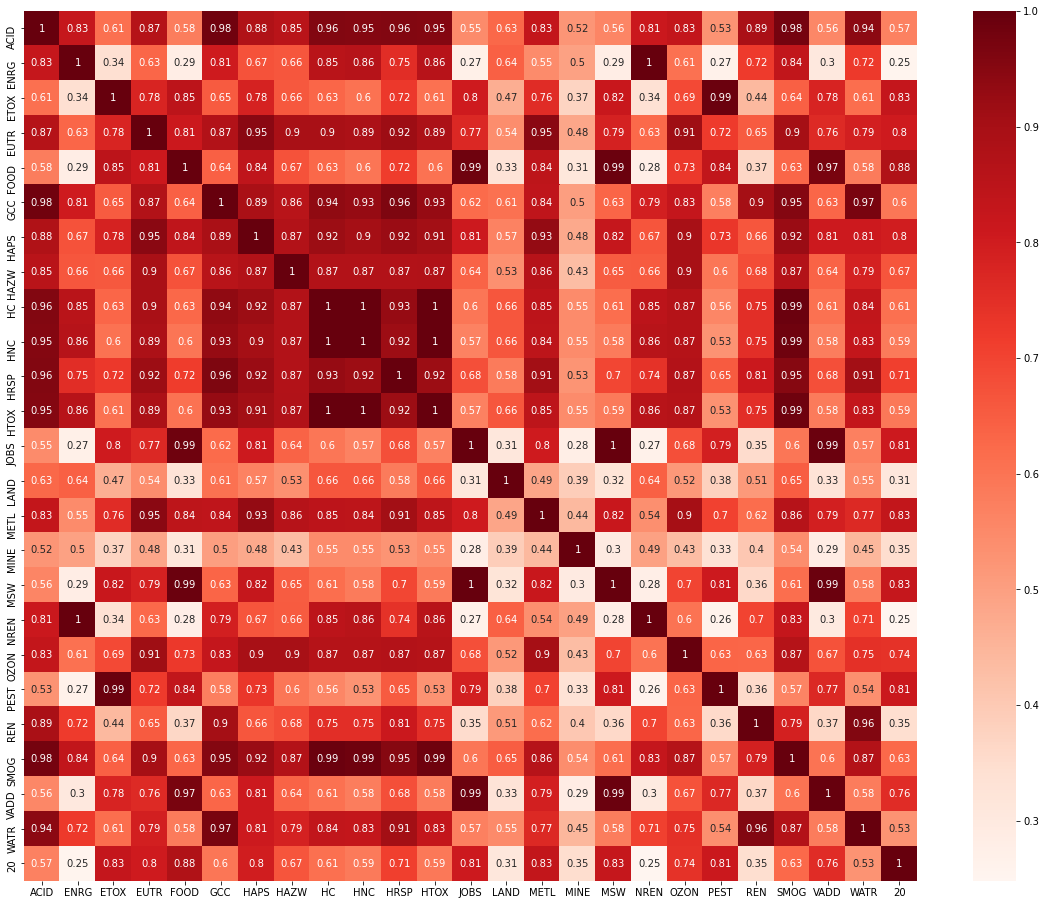

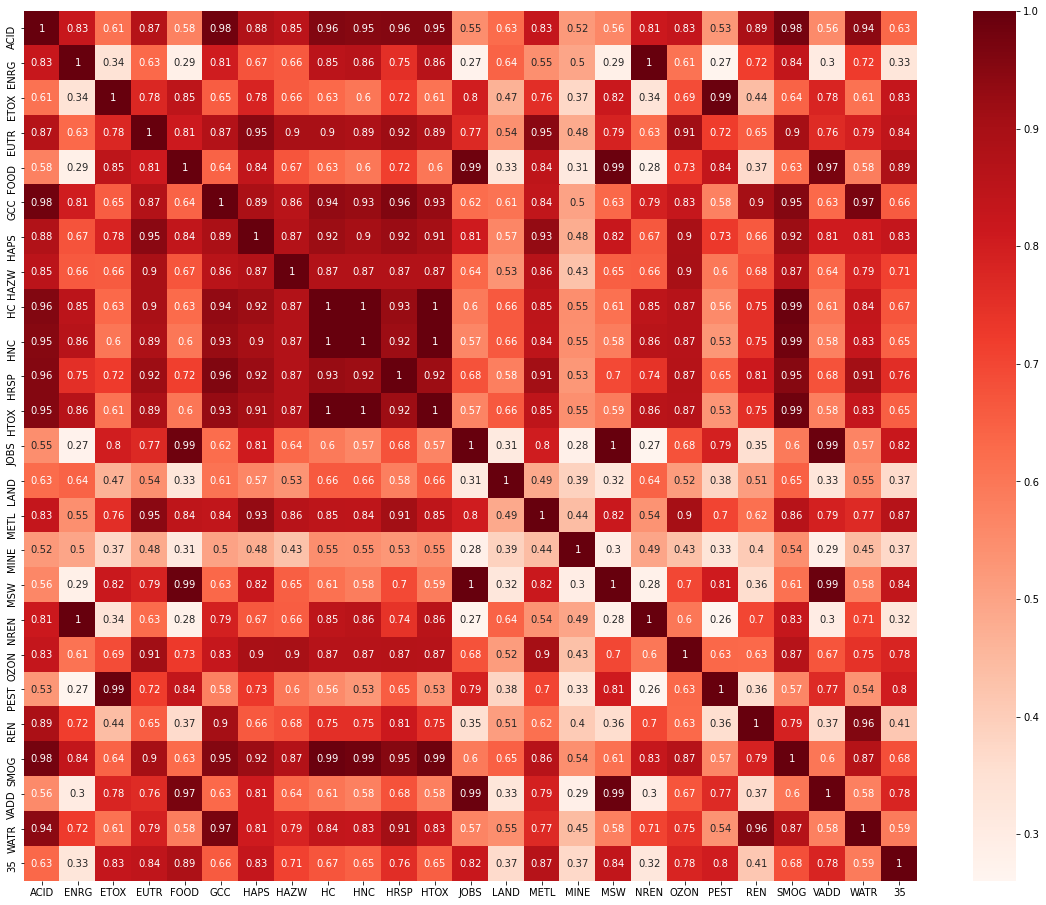

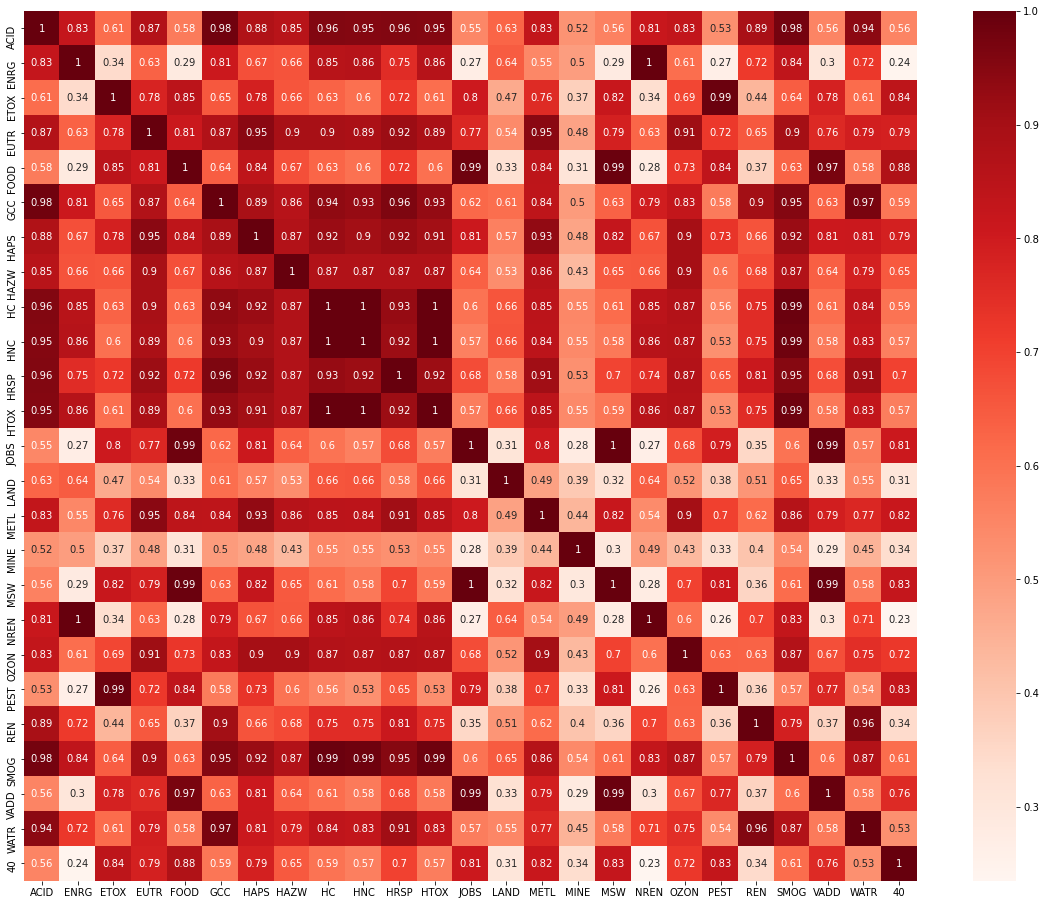

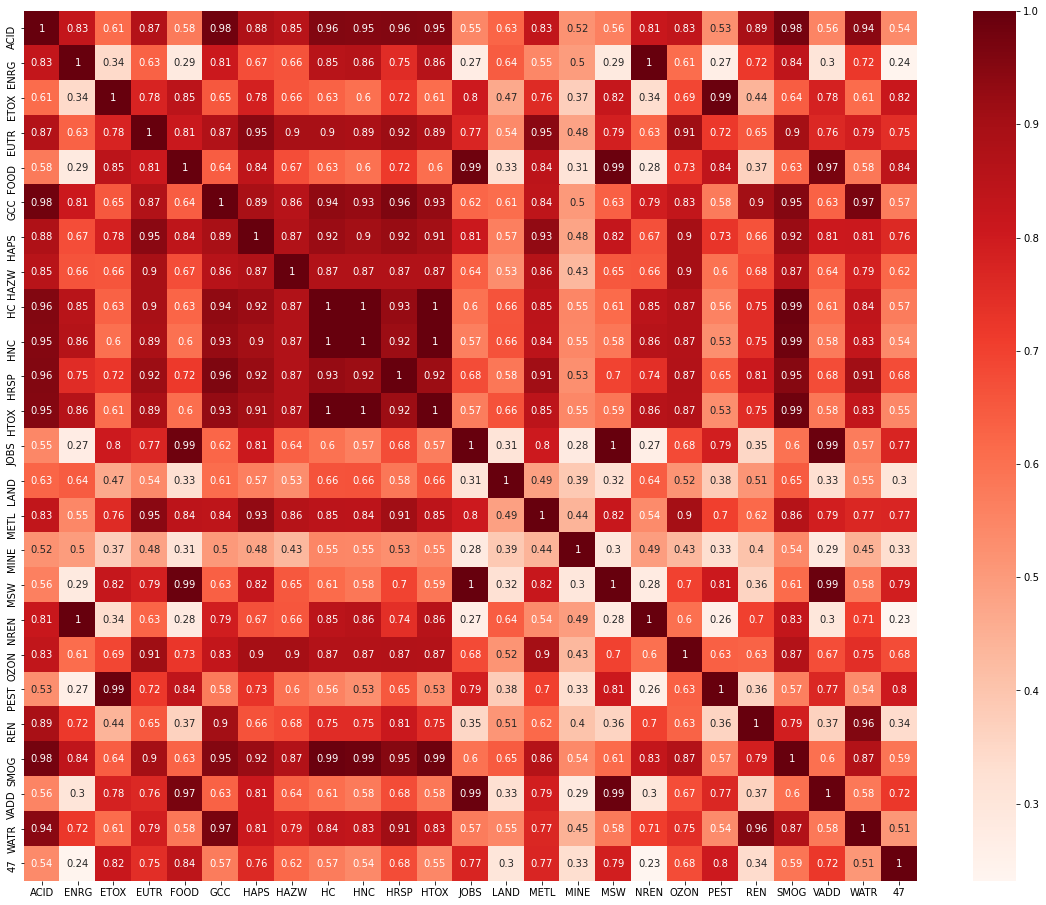

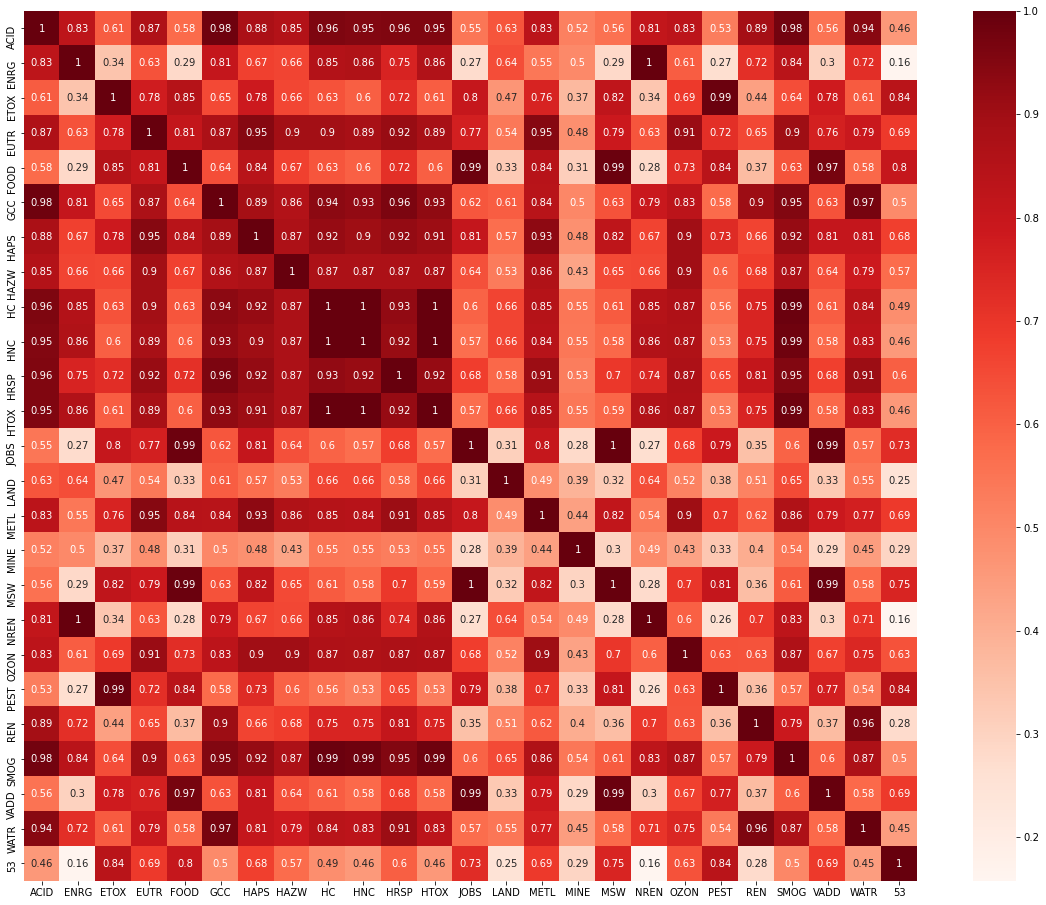

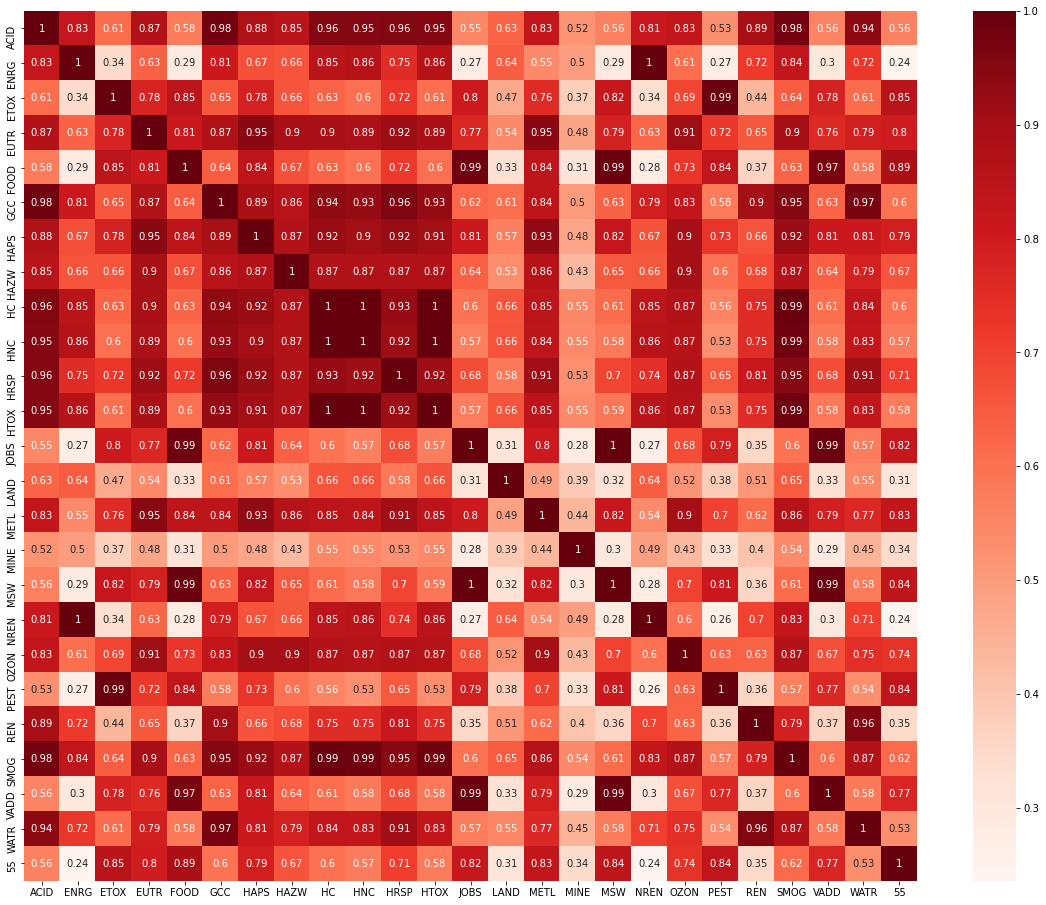

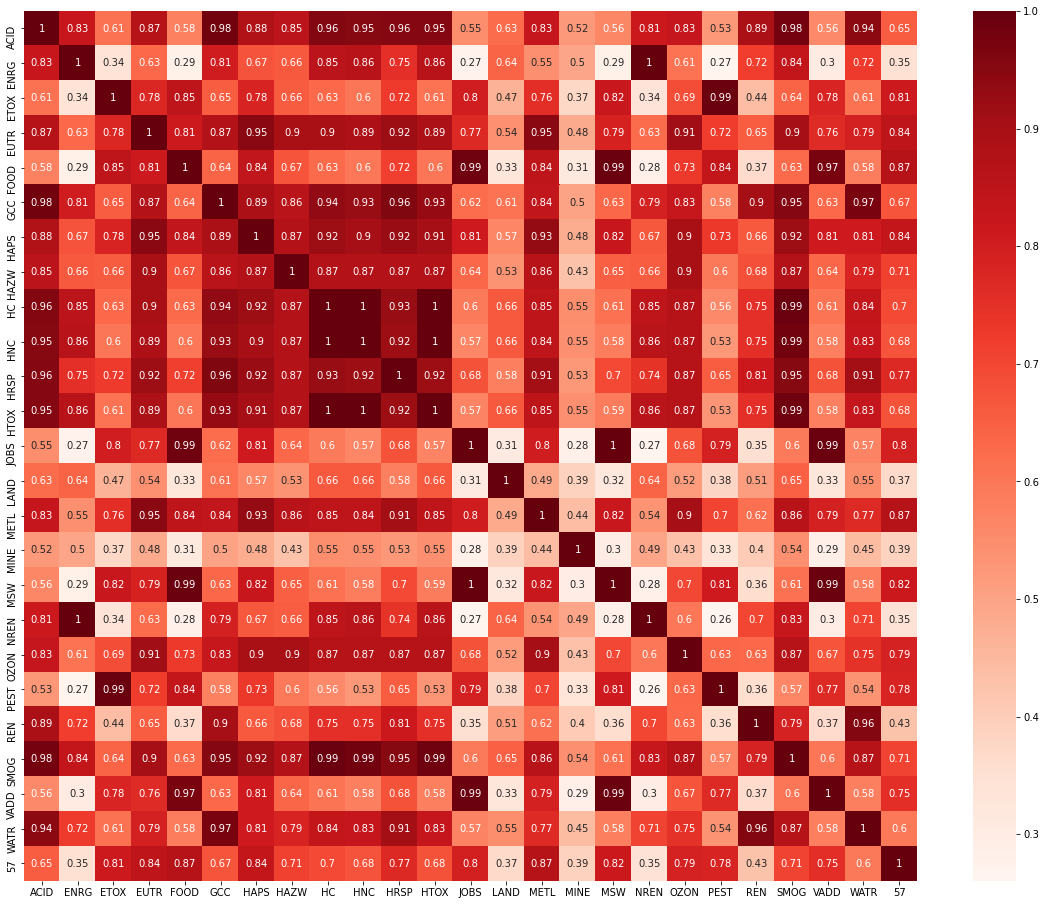

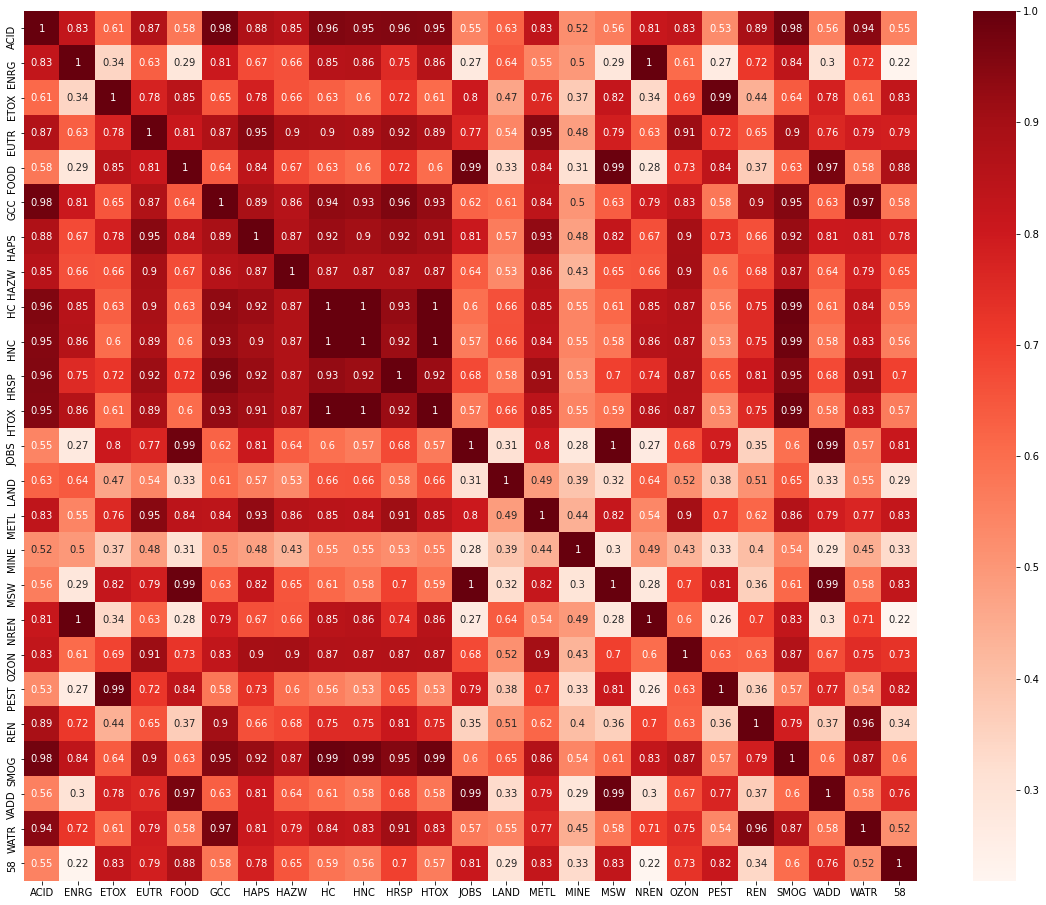

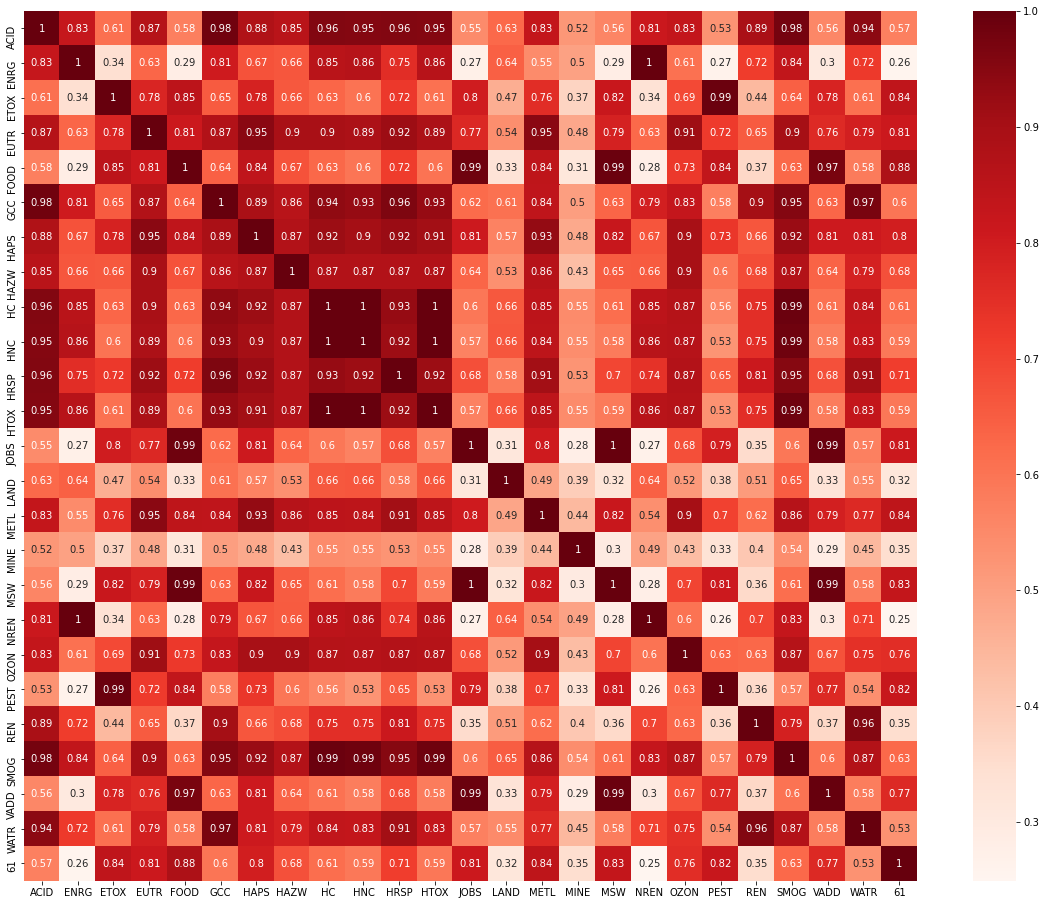

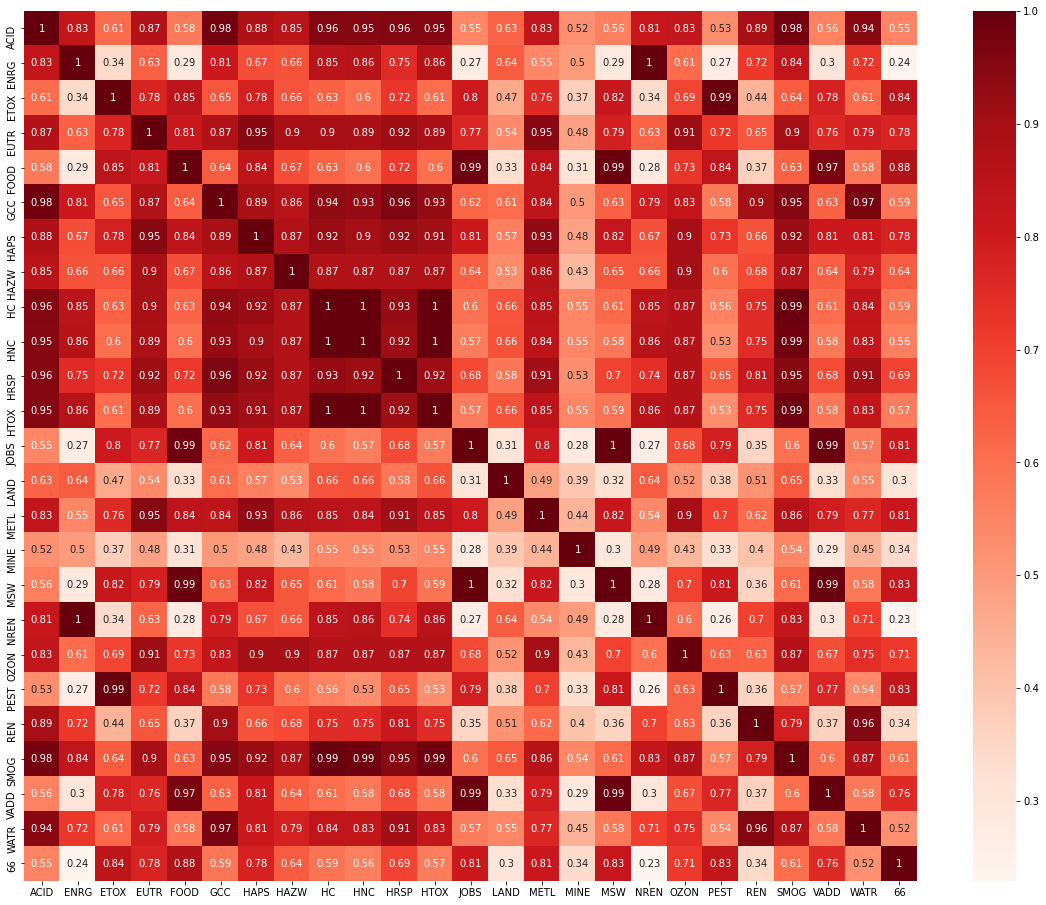

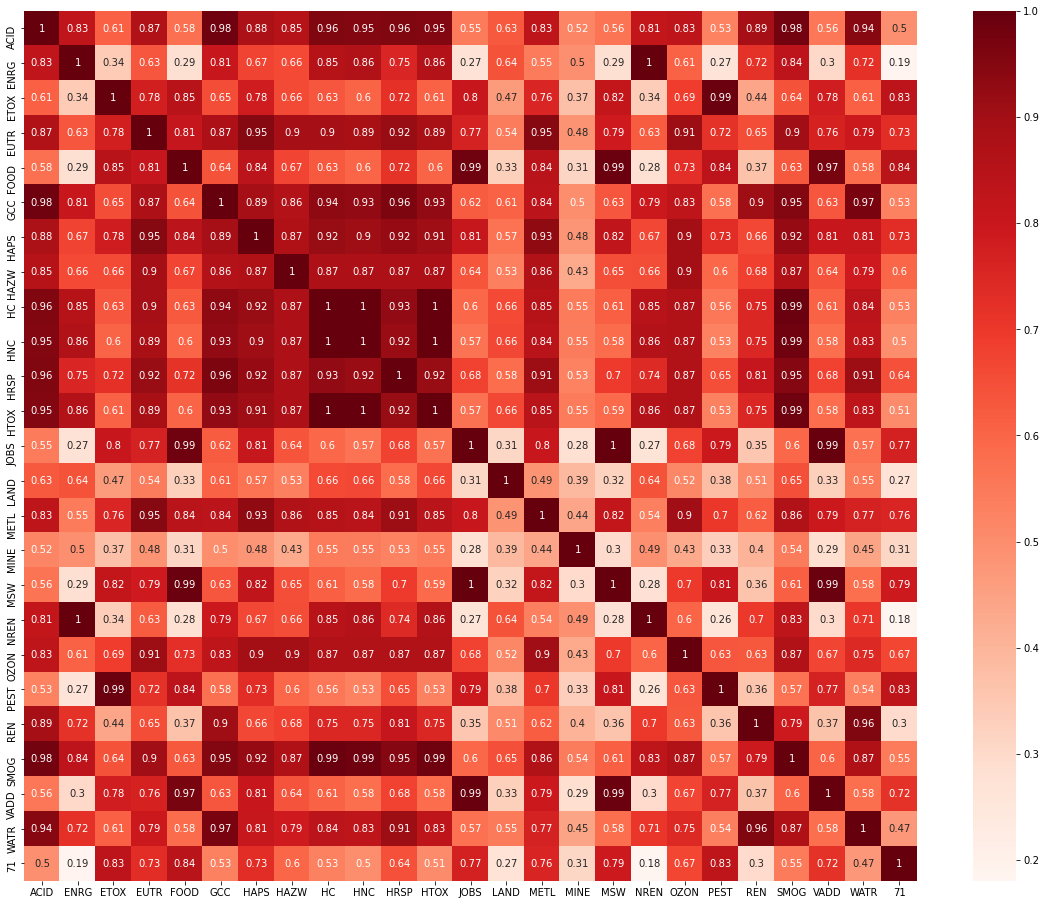

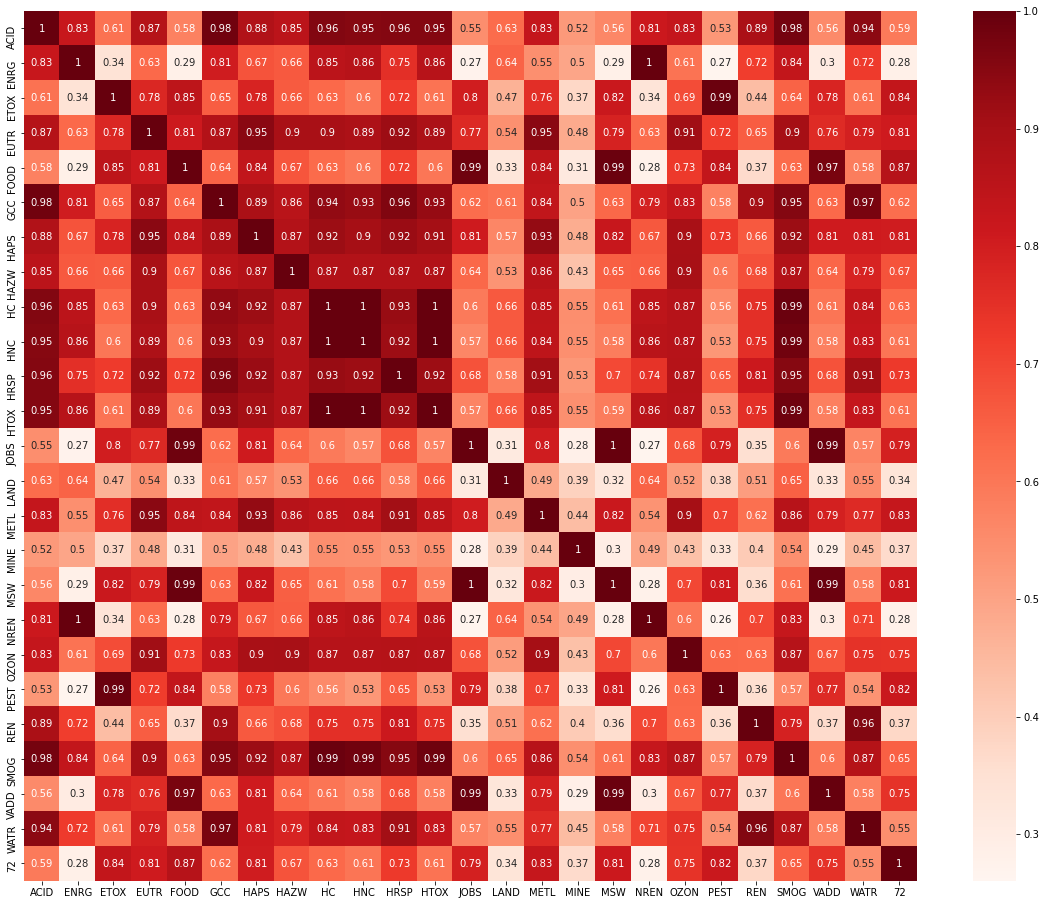

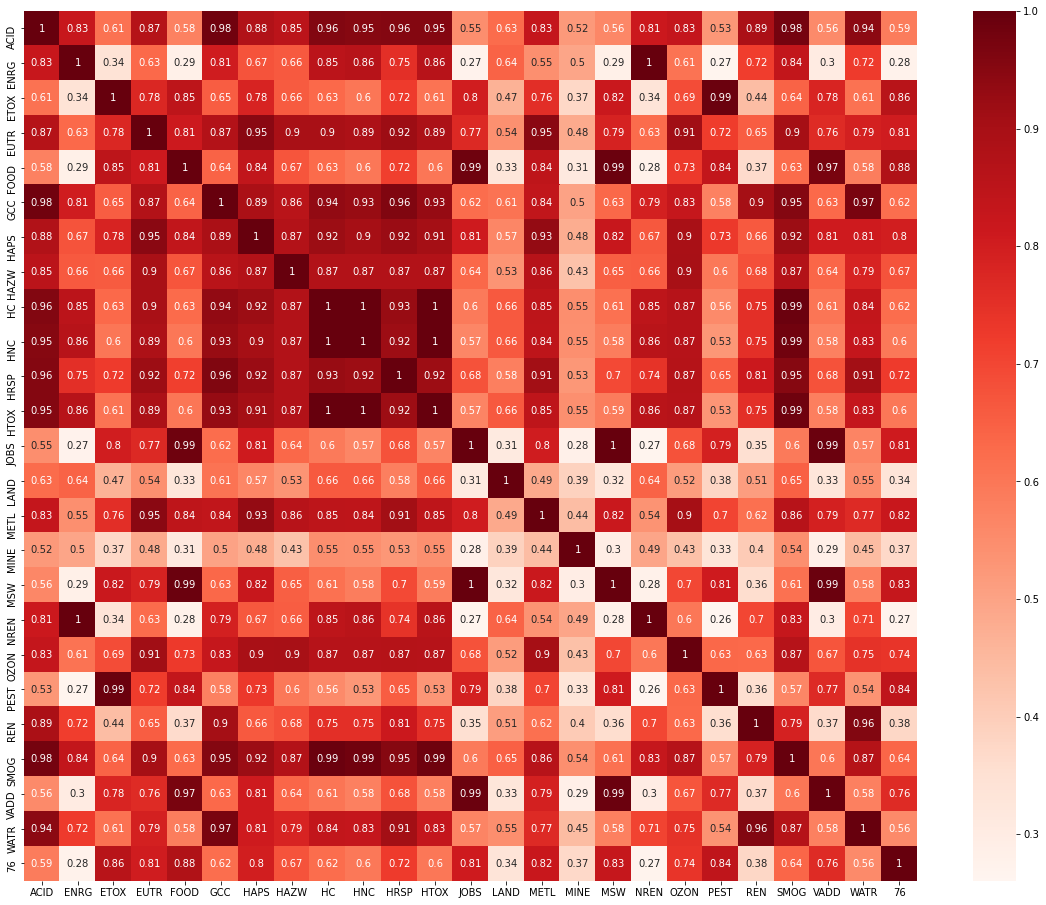

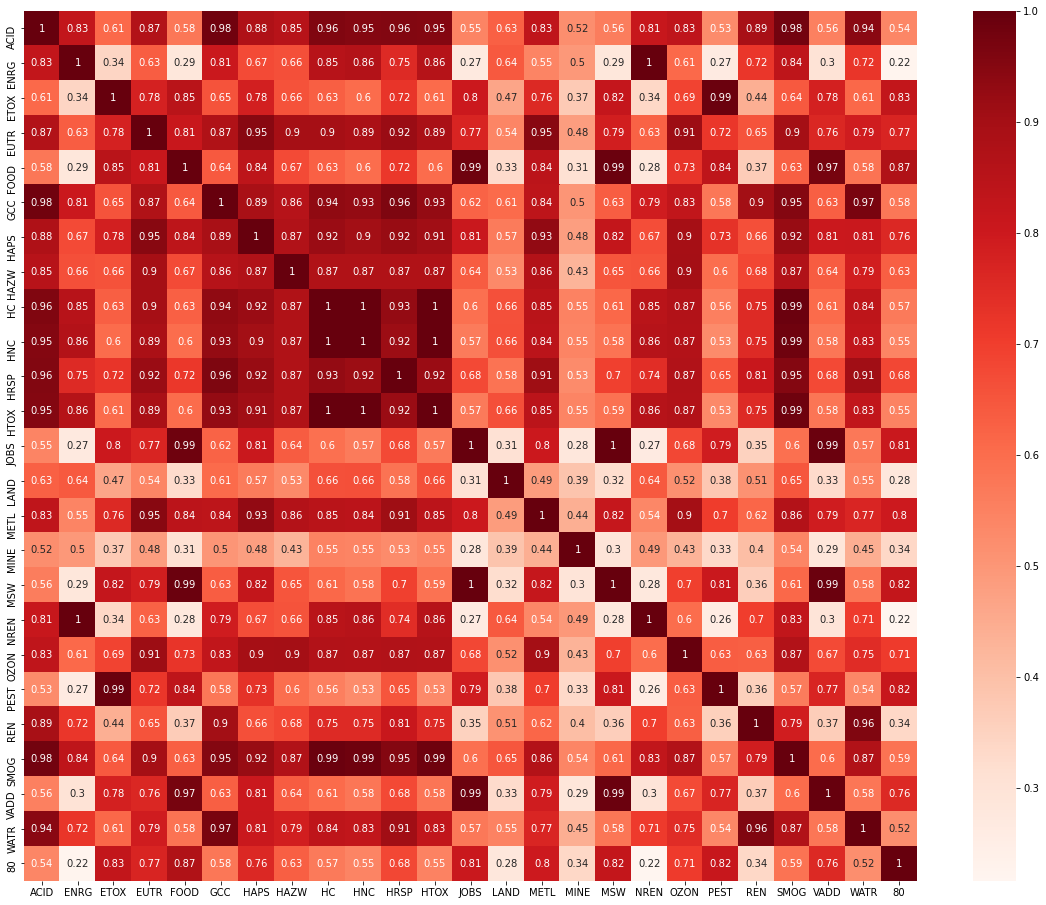

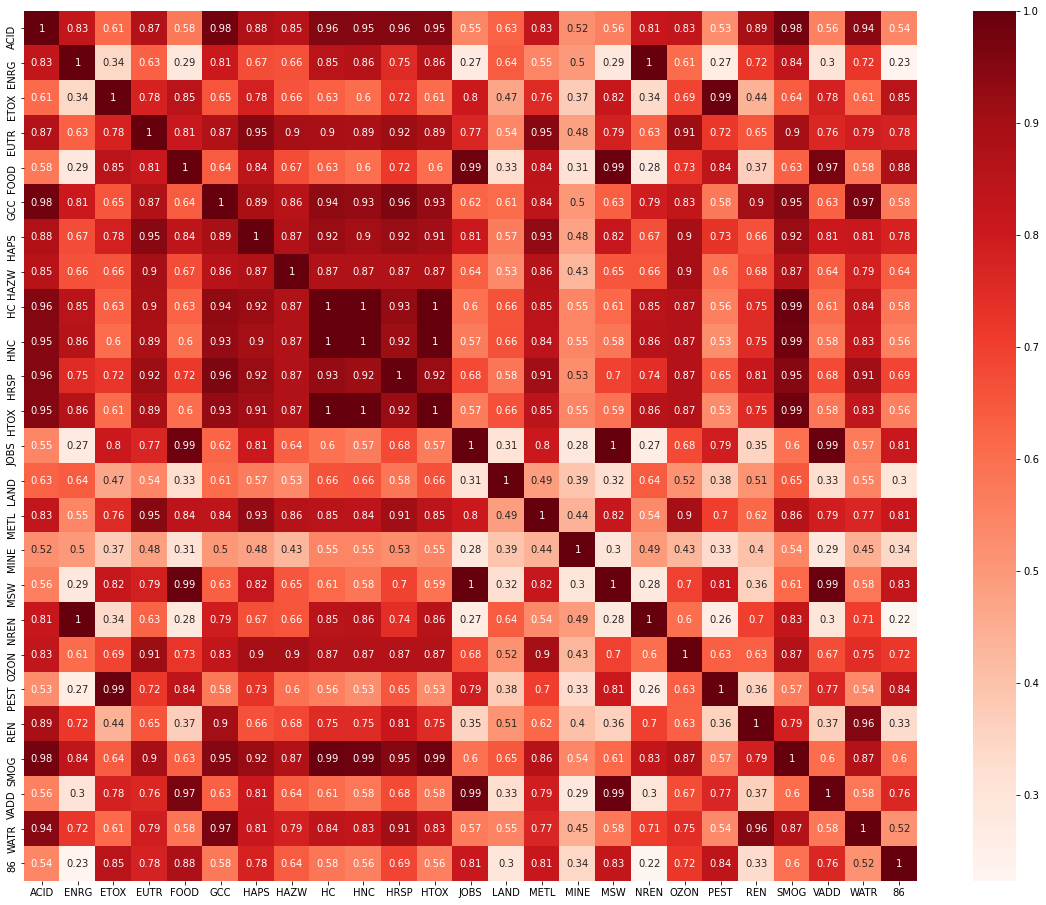

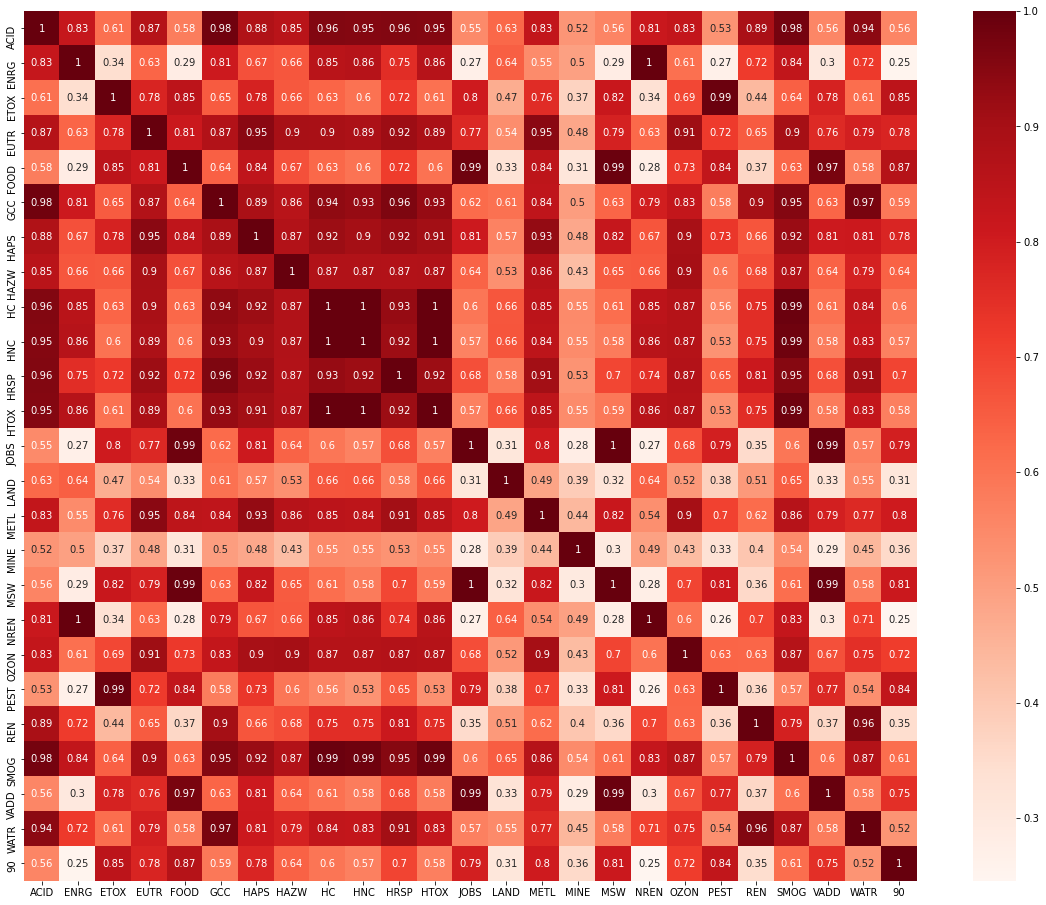

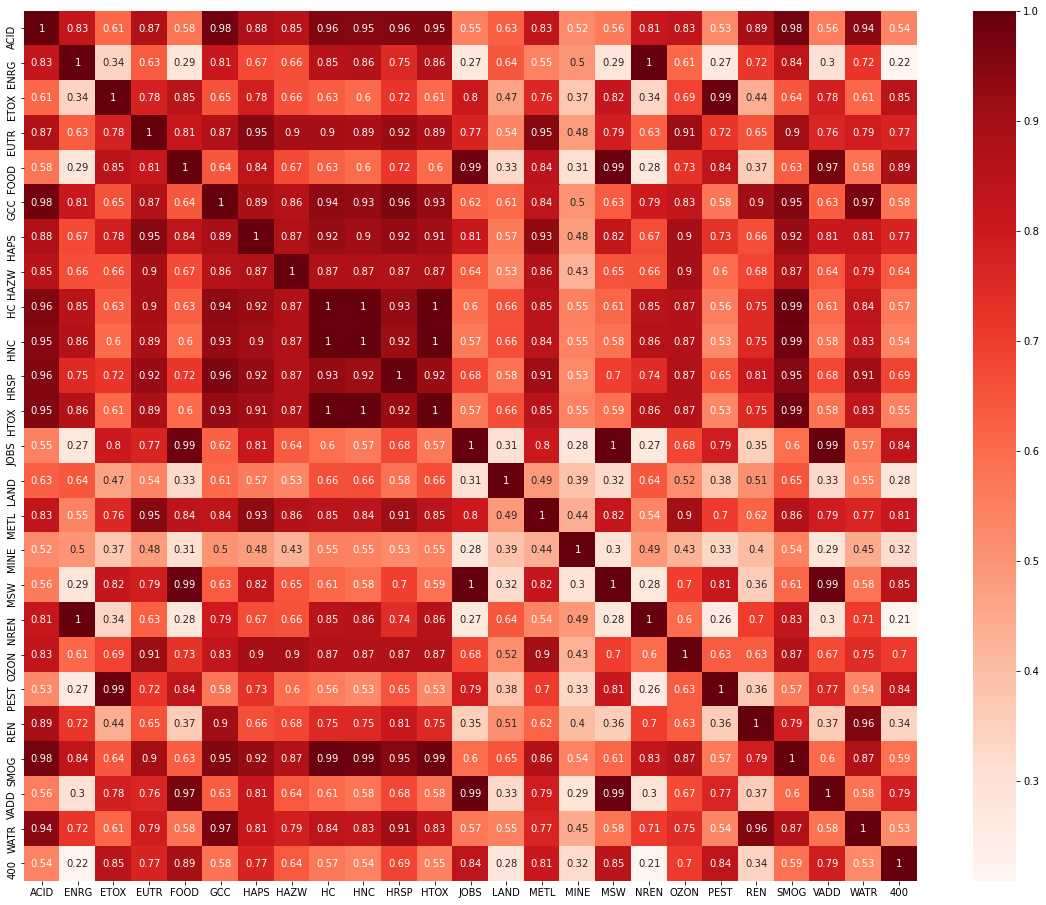

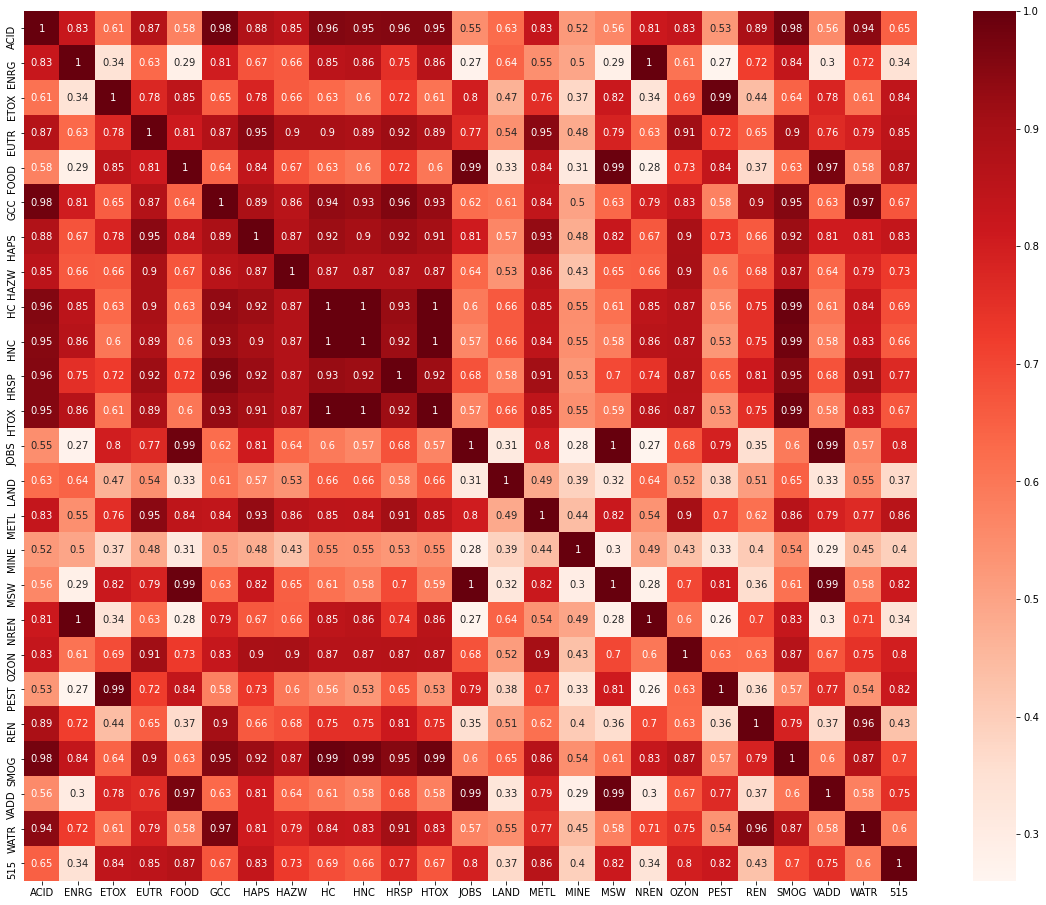

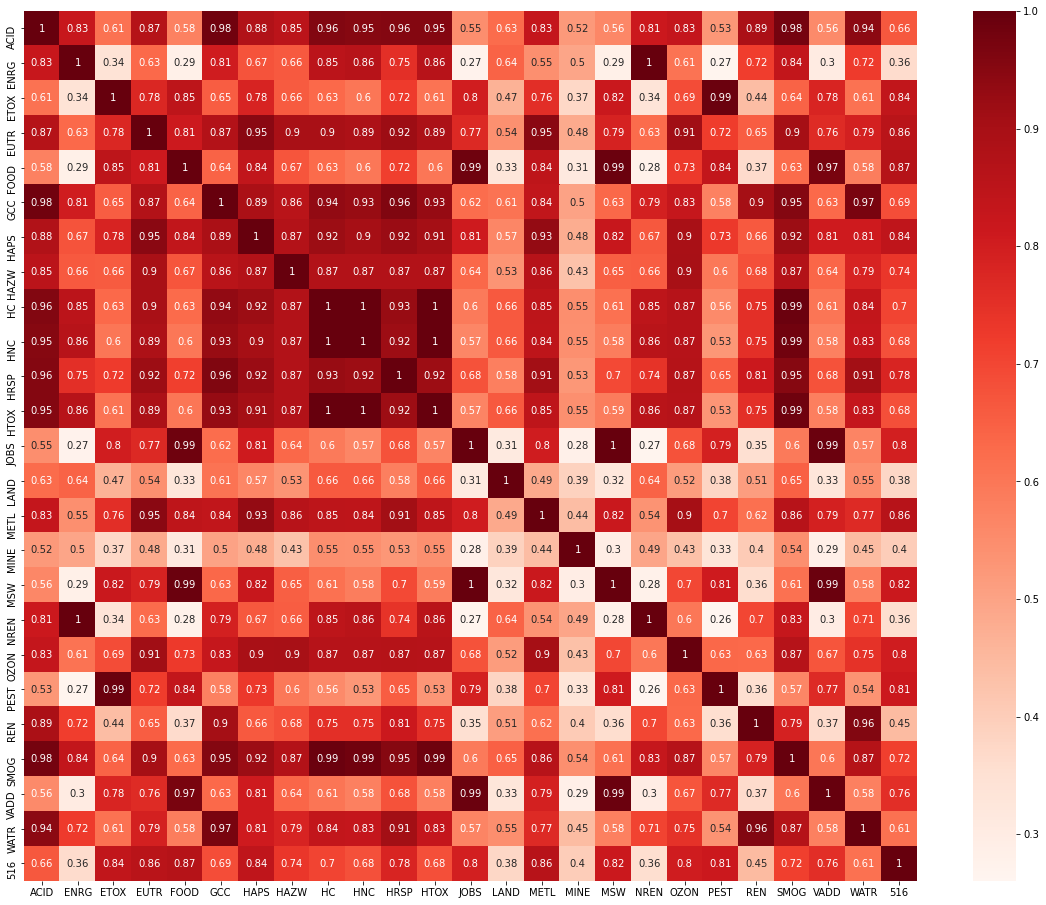

In [79]:

for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    df_factors = newData[['ACID',
       'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
       'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
       'PEST', 'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
    df_factors=df_factors.rename(columns={'annual_count_avg': i})
    
    X = df_factors.iloc[:,0:24]  #independent columns
    y = df_factors.iloc[:,-1]    #target column i.e cancer_rates
    #get correlations of each features in dataset
    corrmat = df_factors.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,16))
    #plot heat map
    g=sns.heatmap(df_factors[top_corr_features].corr(),annot=True,cmap='Reds')
    # doesn't show cancer column because it has vaules that are strings

#### PCA model

##### Testing out without any scaling, with zero-mean scaling, and with zero-mean and std scaling
How to know wheter or not to standardize:
"If the importance of features is independent of the variance of the features, then divide each observation in a column by that column’s standard deviation." ==> Given that I don't think this is the case we shouldn't standardize the data.

In [64]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #df_factors = df_inner[['ACID',
    #   'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
    #   'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
    #   'PEST', 'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
    
    #splitting to test and train
    
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['incidence rate_per_100000']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train2 = scaler.transform(X_train1)
    X_test2 = scaler.transform(X_test1)
    
    
    pca = PCA(n_components=2)
    pca.fit(X_train2)
    
    X_train = pca.transform(X_train2)
    X_test = pca.transform(X_test2)
    
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 100,
                                      max_depth= 8, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    r2_score=rf.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score



print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
Creating RandomForest Model and Fitting the Data
score 0.004634645371436652
cancer type: 3
1    Oral Cavity & Pharynx
Creating RandomForest Model and Fitting the Data
score 0.24538321391613782
cancer type: 17
2    Esophagus
Creating RandomForest Model and Fitting the Data
score 0.3178511425867915
cancer type: 18
3    Stomach
Creating RandomForest Model and Fitting the Data
score 0.32732999260695606
cancer type: 20
4    Colon & Rectum
Creating RandomForest Model and Fitting the Data
score 0.14228546302239287
cancer type: 35
5    Liver & Bile Duct
Creating RandomForest Model and Fitting the Data
score 0.3333028287186768
cancer type: 40
6    Pancreas
Creating RandomForest Model and Fitting the Data
score 0.3776959138205086
cancer type: 47
7    Lung & Bronchus
Creating RandomForest Model and Fitting the Data
score 0.13501381828383408
cancer type: 53
8    Melanoma of the Skin
Creating RandomForest Model and Fitting the Data
score 0.2695377839789107
cance

# LDA

In [107]:

lowercut = data['incidence rate_per_100000'].mean()-data['incidence rate_per_100000'].var()**.3
uppercut = data['incidence rate_per_100000'].mean()+data['incidence rate_per_100000'].var()**.3


data.loc[data['incidence rate_per_100000']<lowercut,'countClass'] = int(0)
data.loc[(data['incidence rate_per_100000']>=lowercut) & (data['incidence rate_per_100000']<=uppercut),'countClass'] = int(1)
data.loc[data['incidence rate_per_100000']>uppercut,'countClass'] = int(2)

data['countClass'] = data['countClass'].astype(int)


In [108]:
l=data['countClass'].unique()
l

array([2, 0, 1])

In [115]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #df_factors = df_inner[['ACID',
    #   'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
    #   'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
    #   'PEST', 'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
    
    #splitting to test and train
    
    
    
    
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['countClass']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    
    LDA = LinearDiscriminantAnalysis()
    

    # Fit on training data
    LDA.fit(X_train, y_train)
    
    #Evaluation
    r2_score=LDA.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score



print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
score 0.9361702127659575
cancer type: 3
1    Oral Cavity & Pharynx
score 0.9893617021276596
cancer type: 17
2    Esophagus
score 1.0
cancer type: 18
3    Stomach
score 0.9989361702127659
cancer type: 20
4    Colon & Rectum
score 0.723404255319149
cancer type: 35
5    Liver & Bile Duct
score 0.997872340425532
cancer type: 40
6    Pancreas
score 0.9936170212765958
cancer type: 47
7    Lung & Bronchus
score 0.7329787234042553
cancer type: 53
8    Melanoma of the Skin
score 0.6574468085106383
cancer type: 55
9    Breast (Female)
score

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


 0.8712765957446809
cancer type: 57
10    Cervix (Female)
score 1.0
cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
score 0.5946808510638298
cancer type: 61
12    Ovary (Female)
score 1.0
cancer type: 66
13    Prostate (Male)
score 0.8446808510638298
cancer type: 71
14    Bladder
score 0.7063829787234043
cancer type: 72
15    Kidney & Renal Pelvis
score 0.8553191489361702
cancer type: 76
16    Brain & ONS
score 1.0
cancer type: 80
17    Thyroid
score 0.9670212765957447
cancer type: 86
18    Non-Hodgkin Lymphoma
score 0.8861702127659574
cancer type: 90
19    Leukemia
score 0.9797872340425532
cancer type: 400
20    Breast (in situ) (Female)
score 0.6670212765957447
cancer type: 515
21    Childhood (Ages <20, All Sites)
score 0.9223404255319149
cancer type: 516
22    Childhood (Ages <15, All Sites)
score 0.9744680851063829
Average score: 0.8825624421831637


C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


# Dividinging the classes depending on each cancer's incidentrates variance and mean 9instead of for all)

In [116]:
sum1 = 0
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    discr=cancerTypes[cancer]["cancer_description"].to_string()
    print(discr)
    
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #df_factors = df_inner[['ACID',
    #   'ENRG', 'ETOX', 'EUTR', 'FOOD', 'GCC', 'HAPS', 'HAZW', 'HC', 'HNC',
    #   'HRSP', 'HTOX', 'JOBS', 'LAND', 'METL', 'MINE', 'MSW', 'NREN', 'OZON',
    #   'PEST', 'REN', 'SMOG', 'VADD', 'WATR', 'annual_count_avg']]
    
    #splitting to test and train
    
    lowercut = newData['incidence rate_per_100000'].mean()-newData['incidence rate_per_100000'].var()**.5
    uppercut = newData['incidence rate_per_100000'].mean()+newData['incidence rate_per_100000'].var()**.5


    newData.loc[newData['incidence rate_per_100000']<lowercut,'countClass'] = int(0)
    newData.loc[(newData['incidence rate_per_100000']>=lowercut) & (newData['incidence rate_per_100000']<=uppercut),'countClass'] = int(1)
    newData.loc[newData['incidence rate_per_100000']>uppercut,'countClass'] = int(2)

    newData['countClass'] = newData['countClass'].astype(int)
    
    
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['countClass']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    
    LDA = LinearDiscriminantAnalysis()
    

    # Fit on training data
    LDA.fit(X_train, y_train)
    
    #Evaluation
    r2_score=LDA.score(X_test, y_test)
    print("score",r2_score)
    sum1 += r2_score



print(f"Average score: {sum1/len(cancerVals)}")

cancer type: 1
0    All Cancer Sites
score 0.8914893617021277
cancer type: 3
1    Oral Cavity & Pharynx
score 0.5702127659574469
cancer type: 17
2    Esophagus
score 0.7680851063829788
cancer type: 18
3    Stomach
score 0.7702127659574468
cancer type: 20
4    Colon & Rectum
score 0.7702127659574468
cancer type: 35
5    Liver & Bile Duct
score 0.8127659574468085
cancer type: 40
6    Pancreas
score 0.5627659574468085
cancer type: 47
7    Lung & Bronchus
score

C:\Users\Owner\Miniconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

 0.7553191489361702
cancer type: 53
8    Melanoma of the Skin
score 0.5117021276595745
cancer type: 55
9    Breast (Female)
score 0.8329787234042553
cancer type: 57
10    Cervix (Female)
score 0.8404255319148937
cancer type: 58
11    Uterus (Corpus & Uterus, NOS) (Female)
score 0.5372340425531915
cancer type: 61
12    Ovary (Female)
score 0.752127659574468
cancer type: 66
13    Prostate (Male)
score 0.7446808510638298
cancer type: 71
14    Bladder
score 0.5797872340425532
cancer type: 72
15    Kidney & Renal Pelvis
score 0.5542553191489362
cancer type: 76
16    Brain & ONS


C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

score 0.725531914893617
cancer type: 80
17    Thyroid
score 0.8117021276595745
cancer type: 86
18    Non-Hodgkin Lymphoma
score 0.5872340425531914
cancer type: 90
19    Leukemia
score 0.5361702127659574
cancer type: 400
20    Breast (in situ) (Female)
score 0.8042553191489362
cancer type: 515
21    Childhood (Ages <20, All Sites)
score 0.8031914893617021
cancer type: 516
22    Childhood (Ages <15, All Sites)
score 0.8585106382978723
Average score: 0.7122109158186865


C:\Users\Owner\Miniconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 